In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [22]:
# Load the dataset
file_path = './Thyroid_Diff.csv'
df = pd.read_csv(file_path)



In [23]:
# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

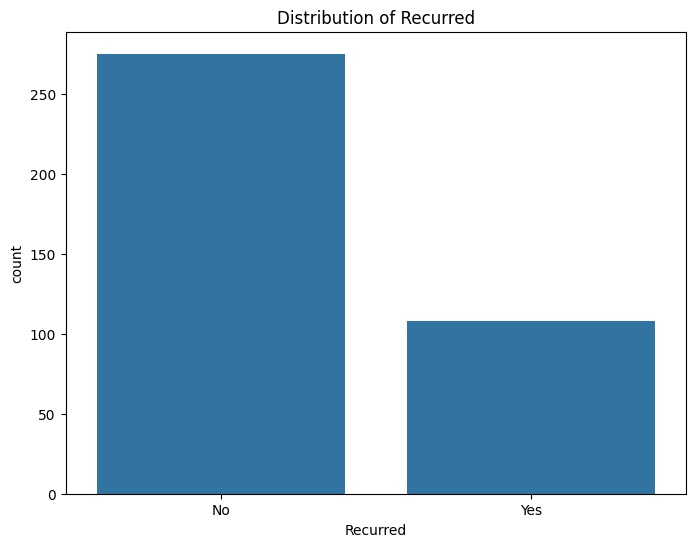

In [24]:
# Distribution of target variable 'Recurred'
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=df)
plt.title('Distribution of Recurred')
plt.show()

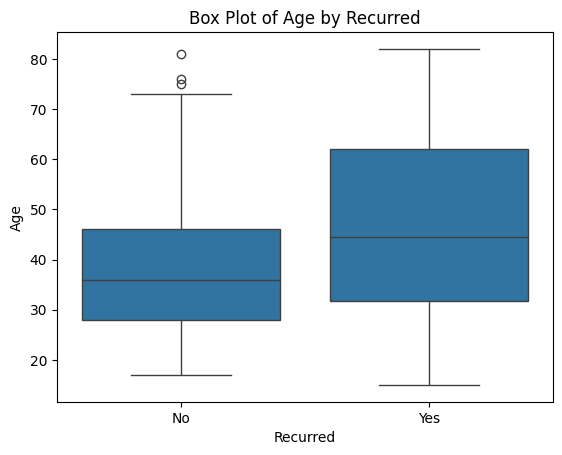

In [25]:
sns.boxplot(x='Recurred', y='Age', data=df)
plt.xlabel('Recurred')
plt.ylabel('Age')
plt.title('Box Plot of Age by Recurred')
plt.show()

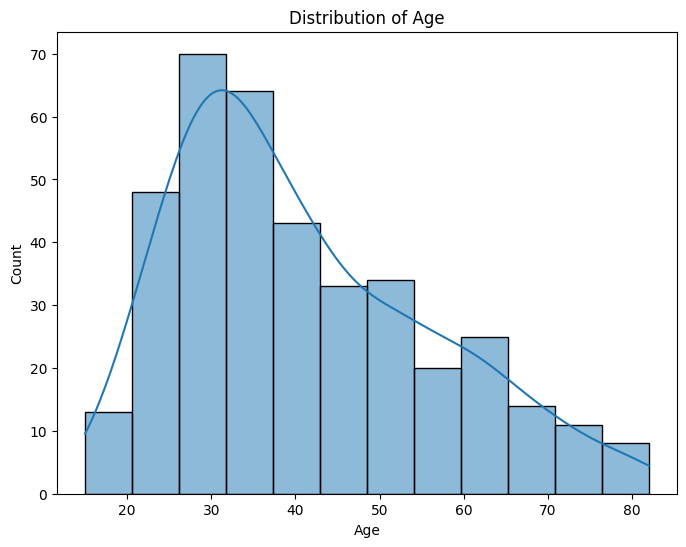

In [26]:
# Distribution of numerical features
numerical_features = ['Age']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

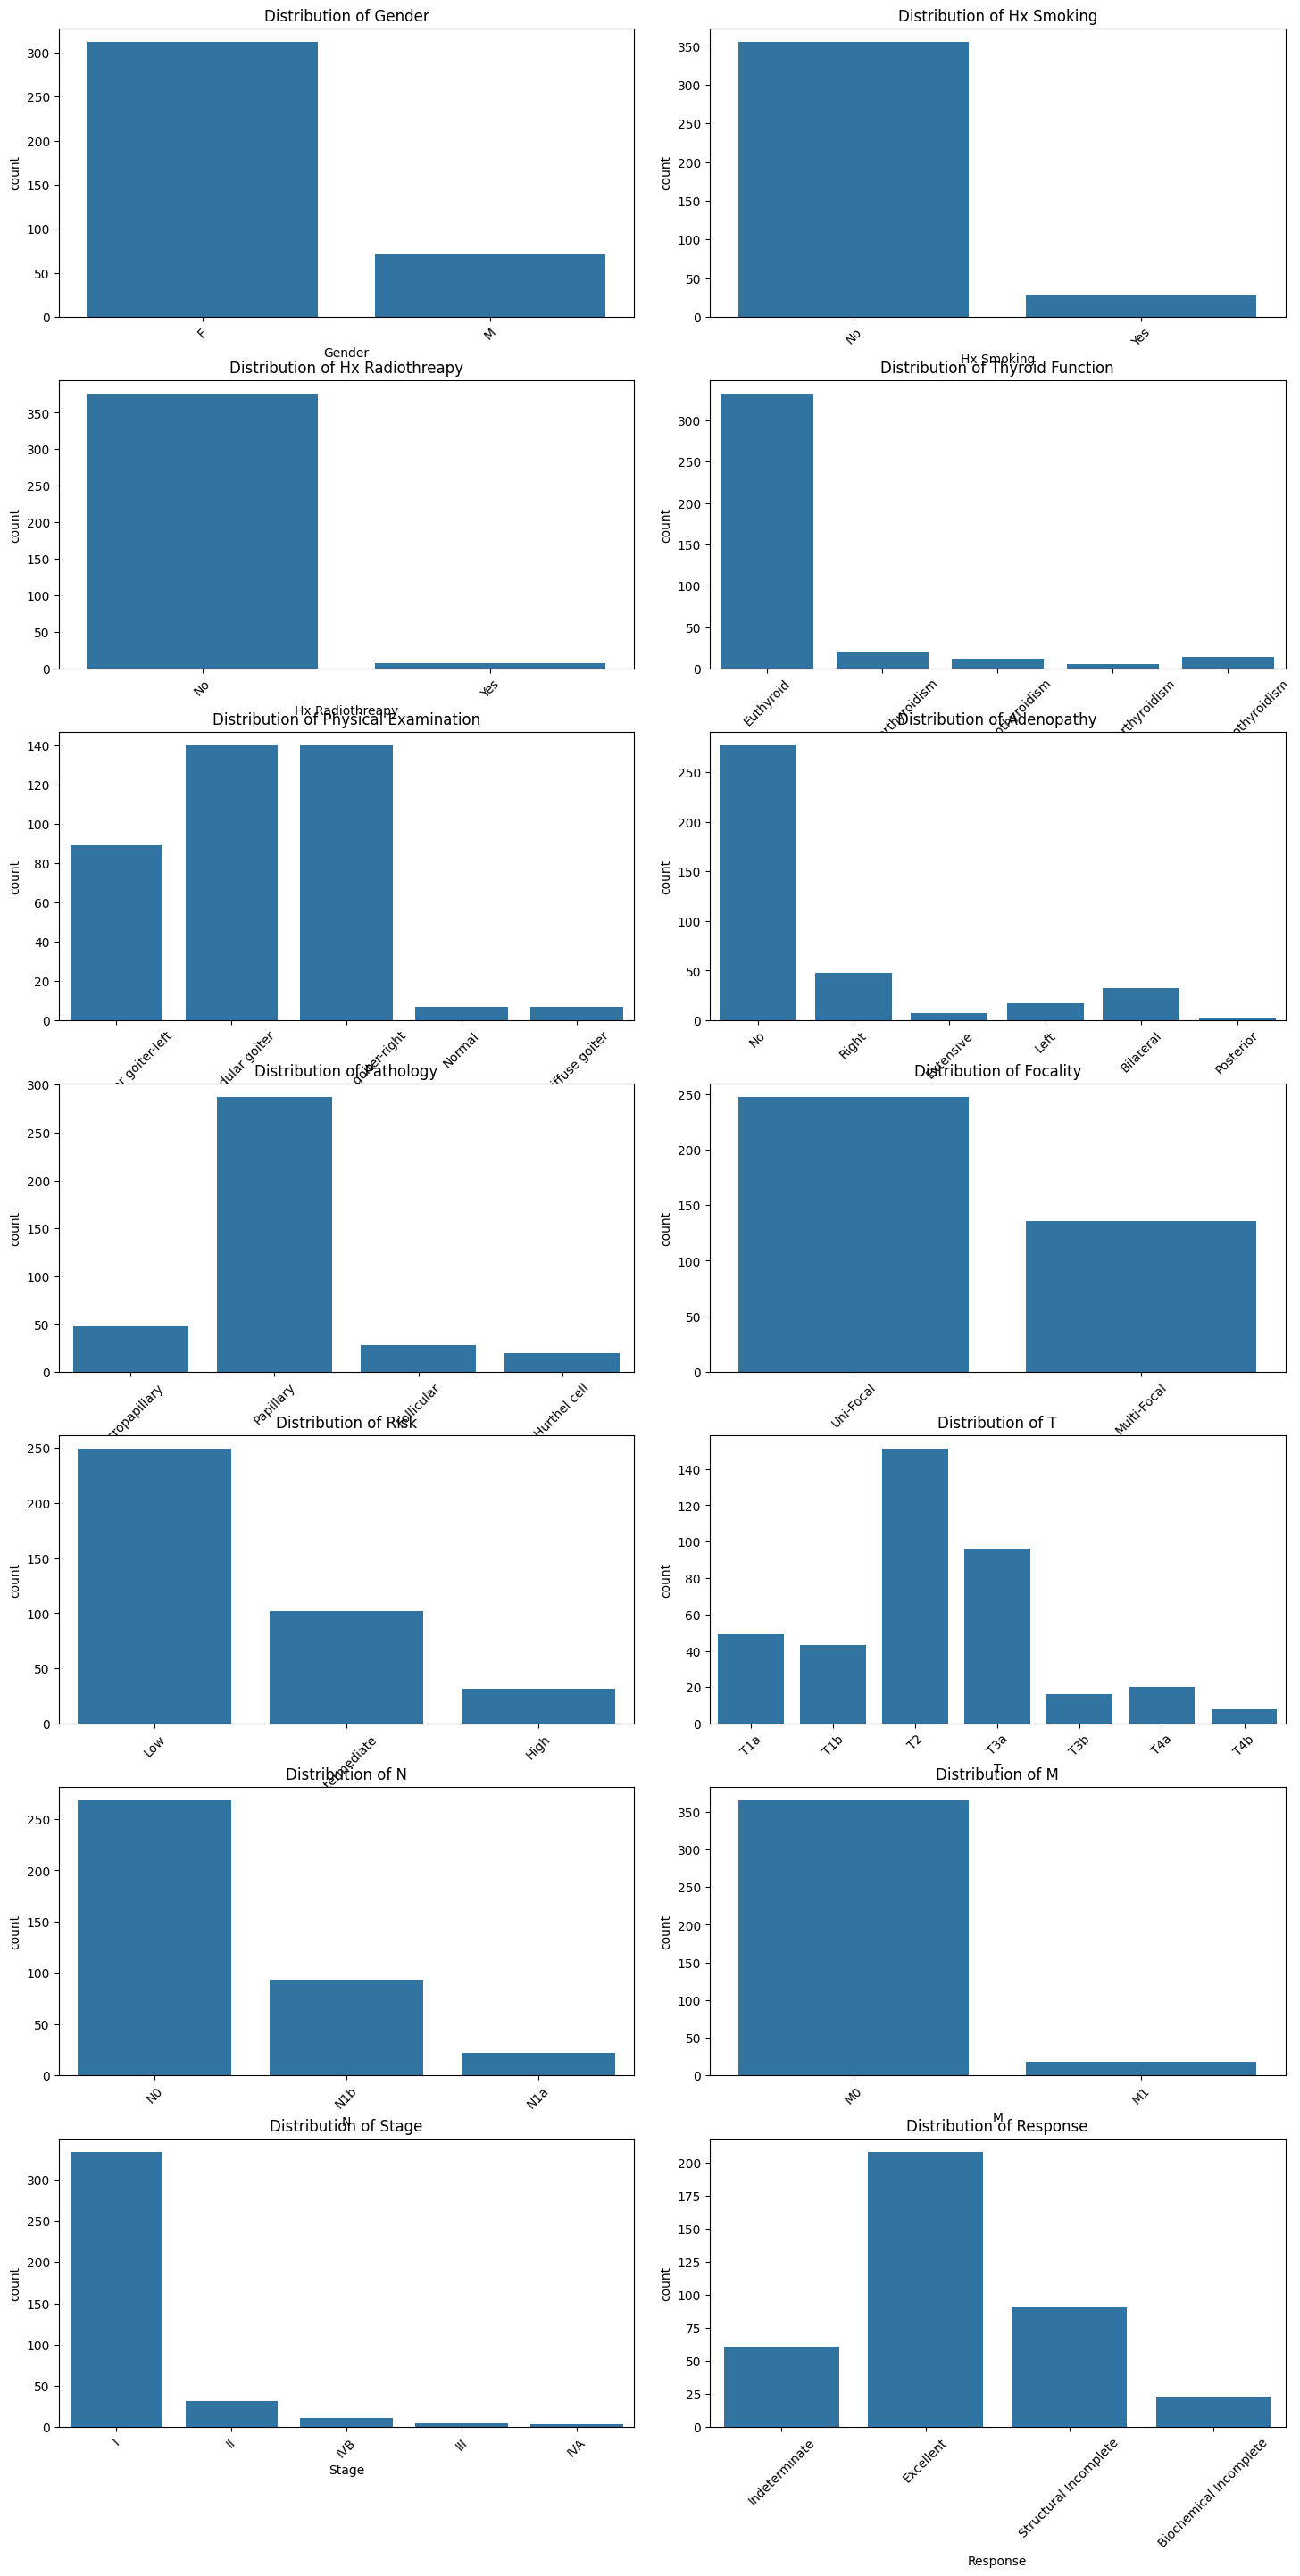

In [27]:
# Count plots for categorical features
categorical_features = ['Gender', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Calculate the grid dimensions
n_features = len(categorical_features)
n_cols = 2  # You can adjust this to change the number of columns
n_rows = math.ceil(n_features / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [28]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Define features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


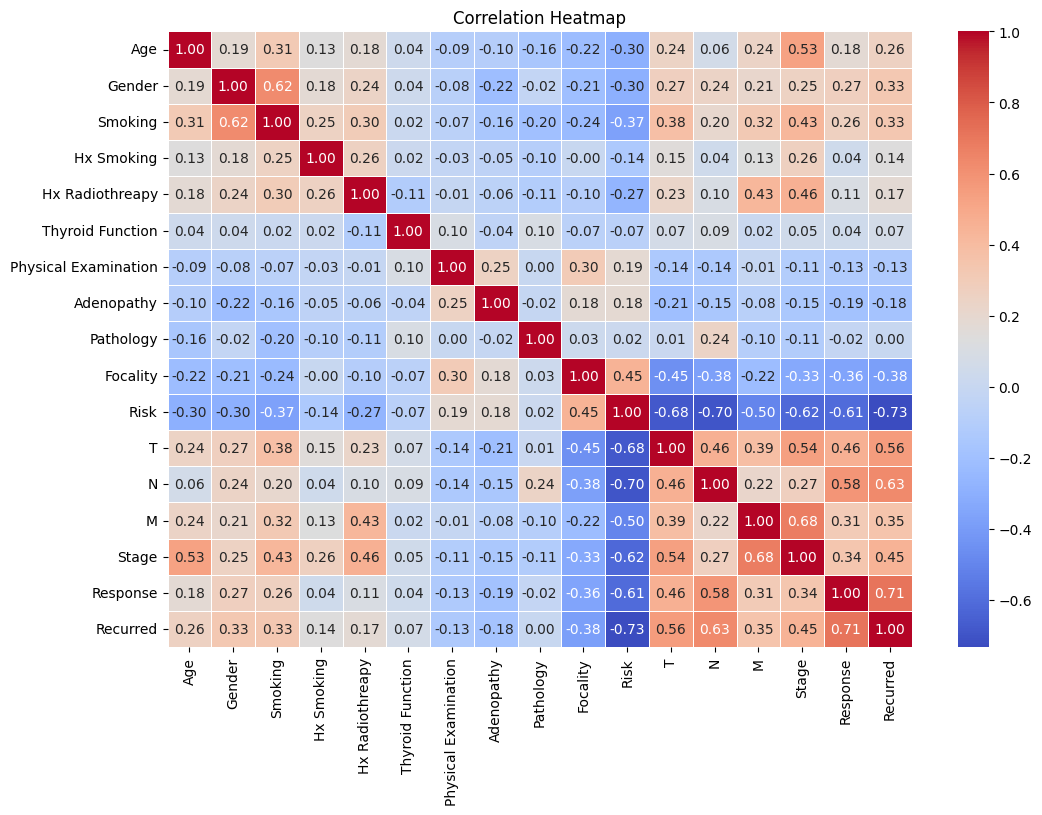

In [29]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions
y_pred = model.predict(X_test)



In [33]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

# Thus in binary classification, the count of true negatives is
# C_{0,0}, false negatives is C_{1,0}, true positives is
# C_{1,1} and false positives is C_{0,1}.

Confusion Matrix:
 [[82  1]
 [ 1 31]]
Accuracy: 0.9826086956521739


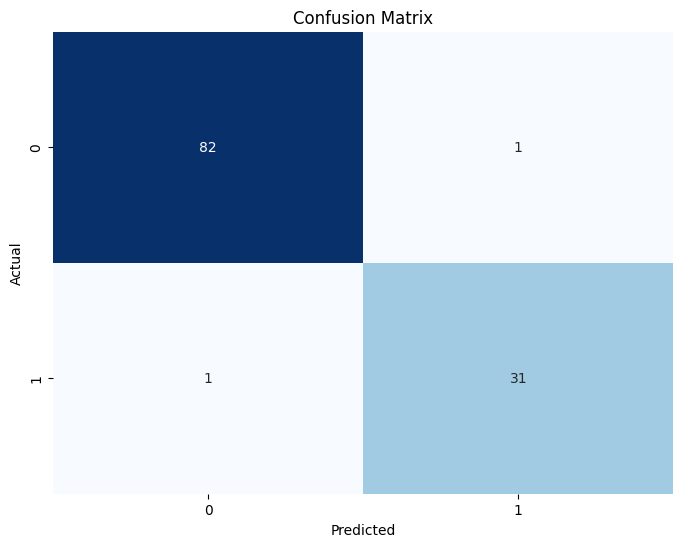

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Data pasien baru bernama Rabih
dummy_data = pd.DataFrame({
    'Age': [22],
    'Gender': ['M'],
    'Smoking': ['No'],
    'Hx Smoking': ['No'],
    'Hx Radiothreapy': ['No'],
    'Thyroid Function': ['Euthyroid'],
    'Physical Examination': ['Single nodular goiter-right'],
    'Adenopathy': ['No'],
    'Pathology': ['Papillary'],
    'Focality': ['Uni-Focal'],
    'Risk': ['Intermediate'],
    'T': ['T3b'],
    'N': ['N1a'],
    'M': ['M0'],
    'Stage': ['I'],
    'Response': ['Excellent']
})

for column in dummy_data.columns:
    if column in label_encoders:
        le = label_encoders[column]
        dummy_data[column] = le.transform(dummy_data[column])

# Make the prediction
prediction = model.predict(dummy_data)
print(f"Prediction for the new data: {'Kambuh' if prediction else 'Gk kambuh'}")


Prediction for the new data: Kambuh
